In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
from pandas import ExcelFile

In [11]:
df = pd.read_excel('VN Index Historical Data Distribution.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,1417.08,1412.15,1417.27,1402.18,753.56K,0.0061
1,2021-07-02,1420.27,1422.89,1424.28,1415.82,706.83K,0.0023
2,2021-07-05,1411.13,1420.27,1421.52,1394.12,774.45K,-0.0064
3,2021-07-06,1354.79,1411.13,1418.99,1354.79,773.51K,-0.0399
4,2021-07-07,1388.55,1354.79,1388.55,1334.58,733.80K,0.0249


In [12]:
r_t = np.log(df['Price']/df['Price'].shift(1))
mean = np.nanmean(r_t)
r_t[0]=mean
r_t[:5]


0    0.000432
1    0.002249
2   -0.006456
3   -0.040744
4    0.024614
Name: Price, dtype: float64

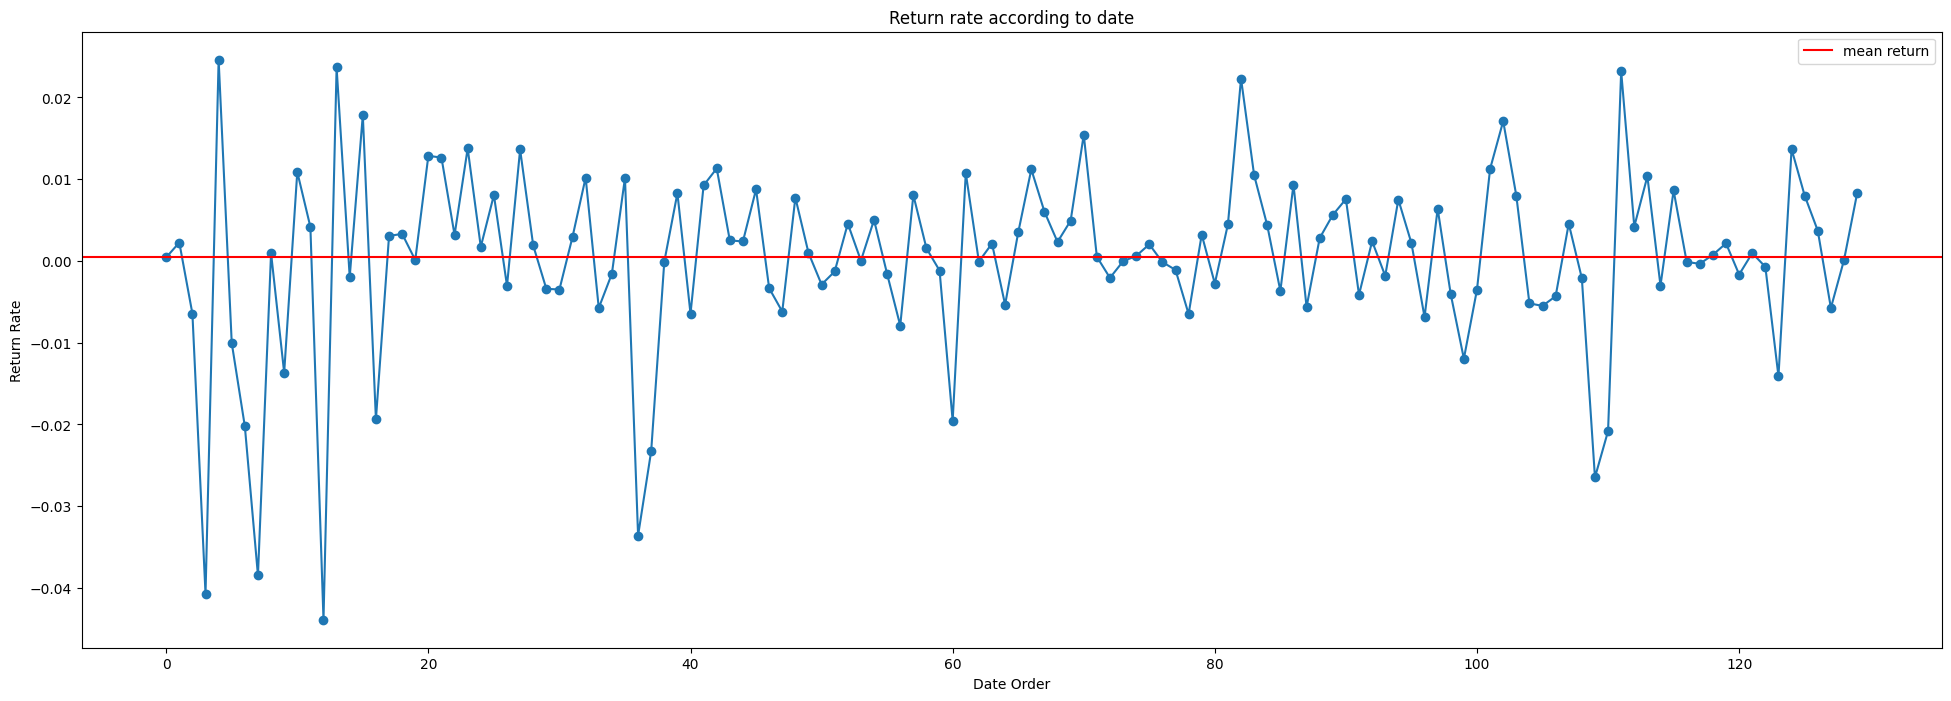

In [13]:
plt.figure(figsize=(24, 8))
plt.plot(np.arange(r_t.shape[0]), r_t, '-o')
plt.axhline(y=mean, label='mean return', c='red')
plt.title('Return rate according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

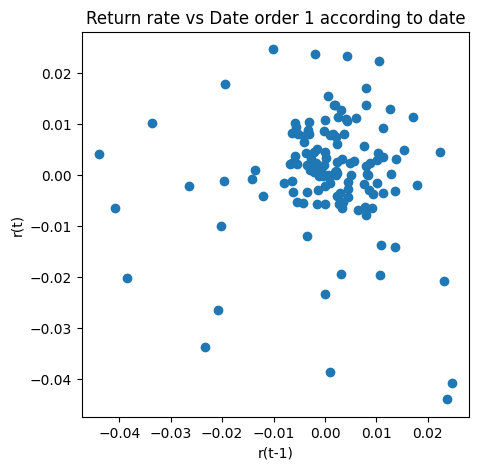

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(x=r_t[1:], y=r_t[:-1])
plt.title('Return rate vs Date order 1 according to date')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_42812\1732086788.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r_t, bins = 20)


Text(0, 0.5, 'Frequency')

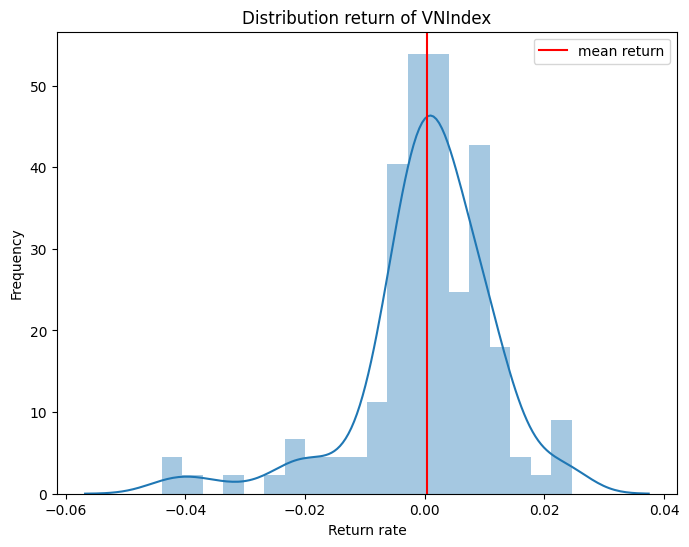

In [15]:
plt.figure(figsize = (8, 6))
sns.distplot(r_t, bins = 20)
plt.axvline(x=mean, label='mean return', c='red')
plt.title('Distribution return of VNIndex')
plt.legend()
plt.xlabel('Return rate')
plt.ylabel('Frequency')

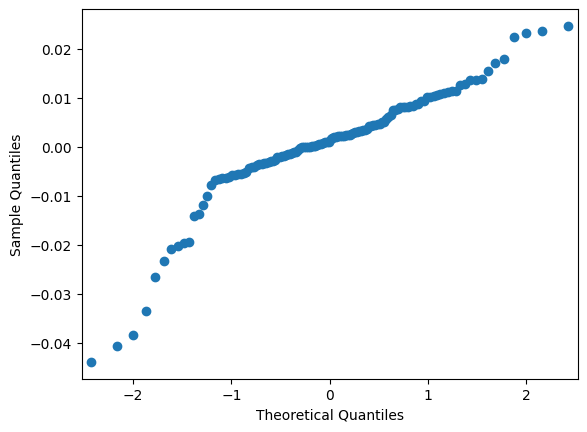

In [16]:
sm.qqplot(r_t)
plt.show()